1. Data Preparation

(a) Use the following features to predict Salary: {
YearsExperience ,
Age ,
WorkingHoursPerWeek}

In [ ]:
import pandas as pd
data=pd.read_csv("/content/employee_salary_data.csv")
X=data[['YearsExperience','Age','WorkingHoursPerWeek']]
y=data['Salary']

(b) Split the dataset into training (70%) and testing (30%) sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 ,random_state=42)

(c) Standardize the features using StandardScaler (fit on the training set, then transform both training and test sets).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

2.   Model Training and Evaluation (MSE Only)

(a) Linear Regression (Ordinary Least Squares)
Train a LinearRegression model on the training set.
Calculate and record the Mean Squared Error (MSE) on both training and testing
sets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

lr_model_train_pred=lr_model.predict(X_train_scaled)
lr_model_test_pred=lr_model.predict(X_test_scaled)

lr_train_mse=mean_squared_error(lr_model_train_pred,y_train)
lr_test_mse=mean_squared_error(lr_model_test_pred,y_test)
print("Linear Regression Train MSE:",lr_train_mse)
print("Linear Regression Test MSE:",lr_test_mse)

Linear Regression Train MSE: 464798.359535203
Linear Regression Test MSE: 7413163.999603168


(b) Ridge Regression
Train a Ridge regression model on the same data using several alpha values: [0.01,
0.1, 1, 10].
Compute and record MSE on both training and testing sets for each alpha.

In [ ]:
from sklearn.linear_model import Ridge

alphas = [0.01, 0.1, 1, 10]
for alpha in alphas:
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_train_scaled,y_train)
  ri_train_prid=ridge.predict(X_train_scaled)
  ri_test_pred=ridge.predict(X_test_scaled)

  mse_train = mean_squared_error(y_train, ri_train_prid)
  mse_test = mean_squared_error(y_test, ri_test_pred)

  print(f"Ridge (alpha={alpha}) -> Train MSE: {mse_train:4f}, Test MSE: {mse_test:4f}")

Ridge (alpha=0.01) -> Train MSE: 487284.684220, Test MSE: 7238028.642924
Ridge (alpha=0.1) -> Train MSE: 818458.990603, Test MSE: 6763175.720779
Ridge (alpha=1) -> Train MSE: 1542830.204623, Test MSE: 6834915.931959
Ridge (alpha=10) -> Train MSE: 20111861.905639, Test MSE: 24973843.564599


(c) Lasso Regression
Train a Lasso regression model on the same data using the same alpha values [0.01,
0.1, 1, 10].
Compute and record MSE on both training and testing sets for each alpha.

In [ ]:
from sklearn.linear_model import Lasso
for alpha in alphas:
  lasso=Lasso(alpha=alpha)
  lasso.fit(X_train_scaled,y_train)
  la_train_prid=lasso.predict(X_train_scaled)
  la_test_pred=lasso.predict(X_test_scaled)

  mse_train_lasso = mean_squared_error(la_train_prid,y_train)
  mse_test_lasso = mean_squared_error(la_test_pred,y_test)
  print(f"lasso({alpha})-> Train MSE: {mse_train_lasso}, Test MSE: {mse_test_lasso}")

lasso(0.01)-> Train MSE: 464798.41337739106, Test MSE: 7412888.731649122
lasso(0.1)-> Train MSE: 464803.6193633862, Test MSE: 7410444.229355175
lasso(1)-> Train MSE: 464799.3675280517, Test MSE: 7413152.740975569
lasso(10)-> Train MSE: 464899.24023295514, Test MSE: 7410007.03244596


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.418e+05, tolerance: 1.275e+05
  model = cd_fast.enet_coordinate_descent(


3. Visualization

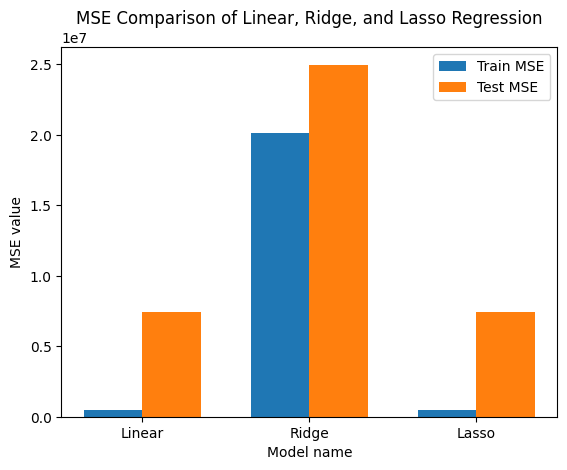

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mse_train_linear =464798.359535203
mse_test_linear =7413163.999603168

mse_train_ridge =20111861.905639 #alpha =10
mse_test_ridge = 24973843.564599

mse_train_lasso =464899.24023295514
mse_test_lasso =7410007.03244596

models = ["Linear", "Ridge", "Lasso"]
train_mse = [mse_train_linear, mse_train_ridge, mse_train_lasso]
test_mse  = [mse_test_linear, mse_test_ridge, mse_test_lasso]
x = np.arange(len(models))#[0>>linear][1>>ridge][2>>lasso]
width = 0.35
plt.bar(x - width/2, train_mse, width, label='Train MSE')
plt.bar(x + width/2, test_mse, width, label='Test MSE')

plt.xlabel("Model name")
plt.ylabel("MSE value")
plt.title("MSE Comparison of Linear, Ridge, and Lasso Regression")
plt.xticks(x, models)#[0,linear][1,ridge][2,lasso]
plt.legend()

plt.show()

**The pefect model is ridge Regression for this data**